# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Creating the Decision Tree

In [3]:
X = df.drop(columns=['target']) # For training we take all the columns except the target column
y = df['target'] # The Target column is what we aim to predict

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y) # splitting the dataset into train and test

In [5]:
clf = tree.DecisionTreeClassifier(random_state=0) # creating the classifer object
clf.fit(x_train,y_train) # we are creating the decision tree using training data
y_train_pred = clf.predict(x_train) # This will give us how well the model performs on training data
y_test_pred = clf.predict(x_test) # This will give us how well the model performs on testing data

# Visualising The tree

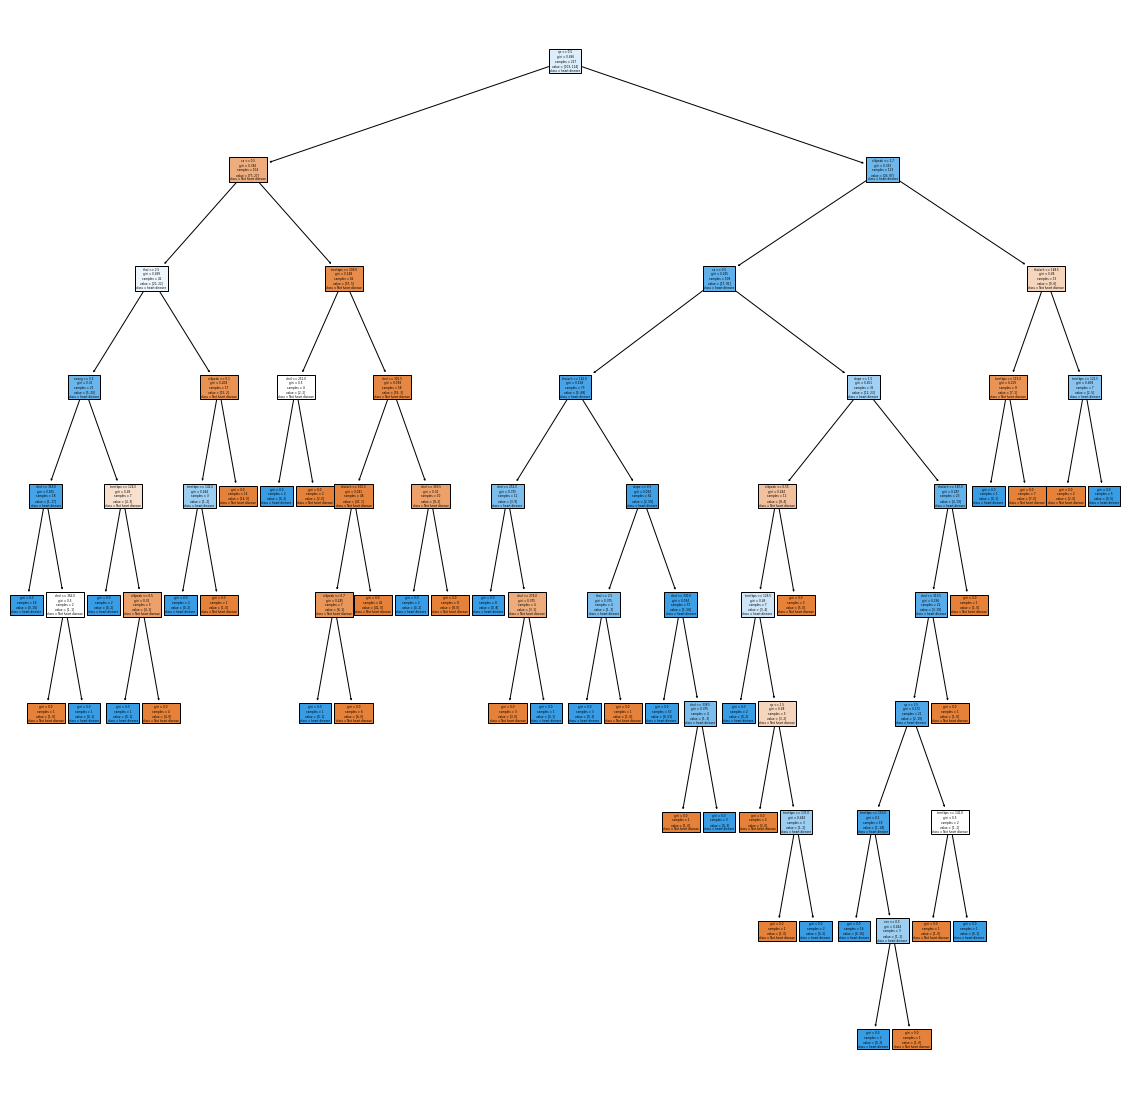

In [6]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.savefig('Original_tree.png')
plt.show()


In [7]:
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6842105263157895


In [8]:
"""
Here we are computing the possible Alpha values. We then loop through these values one by one creating a decision tree for each value of alpha 
Then we see from the training and testing scores which alpha value can be used for a good decision tree
"""
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00398574 0.00416055 0.00426085 0.00431351 0.00503461
 0.00587372 0.00658513 0.00660793 0.00704846 0.00770925 0.0079683
 0.00805538 0.00839102 0.00869211 0.00967435 0.01181736 0.01200441
 0.01627985 0.0227312  0.04151088 0.04332529 0.13894156]


# Choosing the value for alpha

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

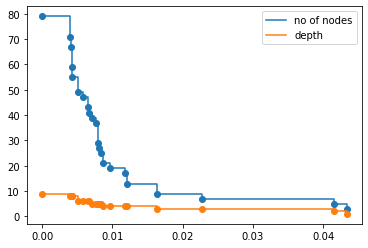

In [10]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


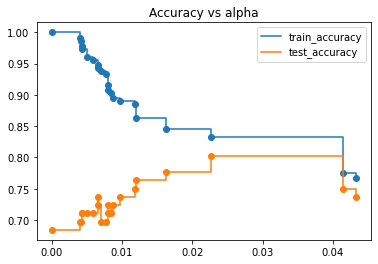

In [11]:
"""
From the above plot it is clear that as the alpha value increases the depth of the tree decreases. Now we calculate the Train accuracy and test accuracy to see which alpha value can be selected.
"""
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


In [12]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020) # We have chosen 0.020 as the value for alpha as it seems optimal.
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

# Pruned decision Tree

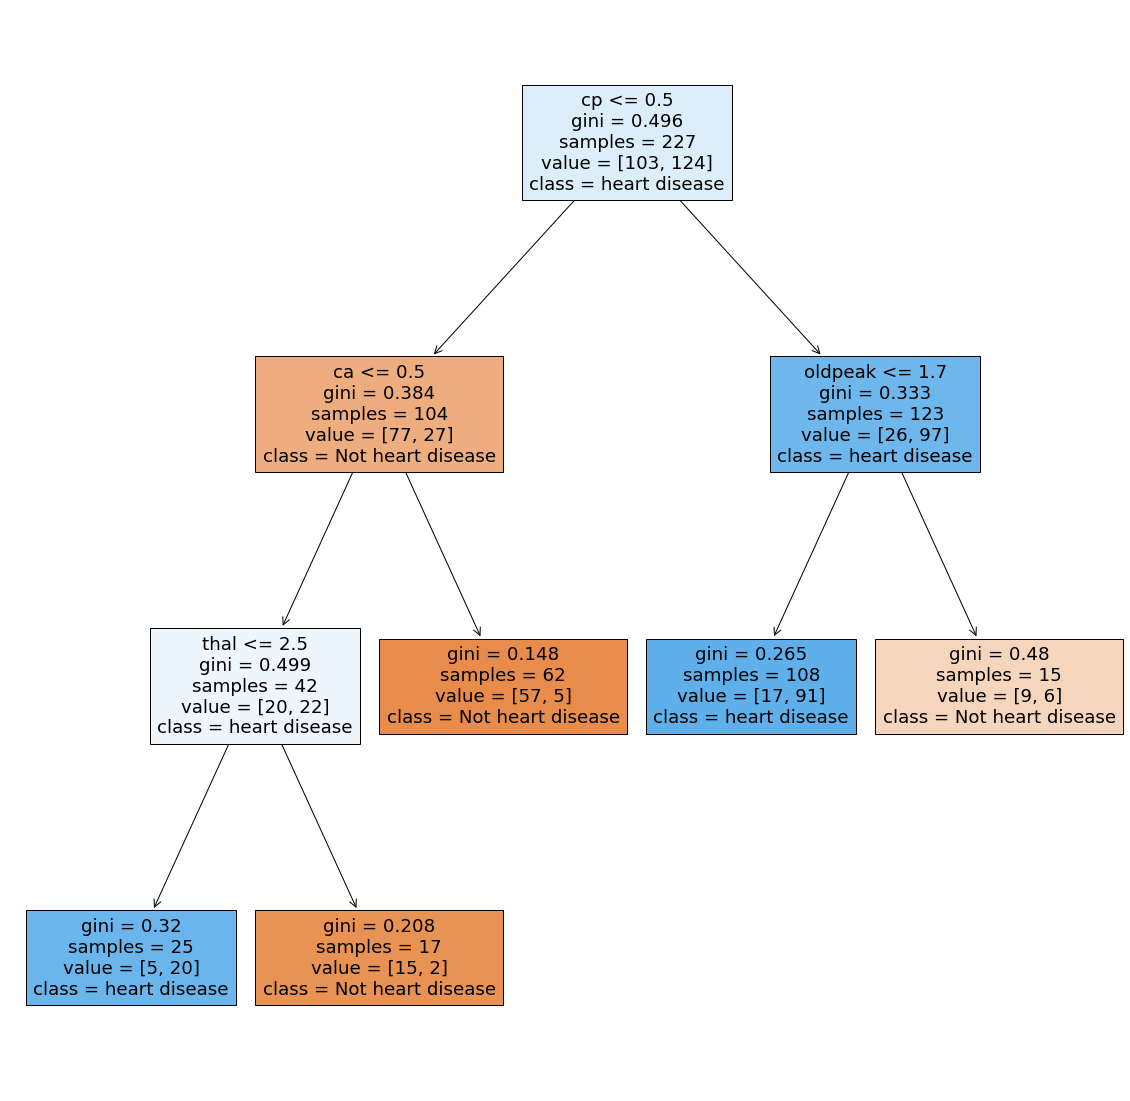

In [13]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.savefig('prunedtree.png')
plt.show()

In [14]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.8458149779735683
Test score 0.7763157894736842


In [15]:
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5394736842105263


In [16]:
from sklearn.tree import DecisionTreeClassifier 

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) # max depth parameter can also be used to control the tree depth

In [18]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

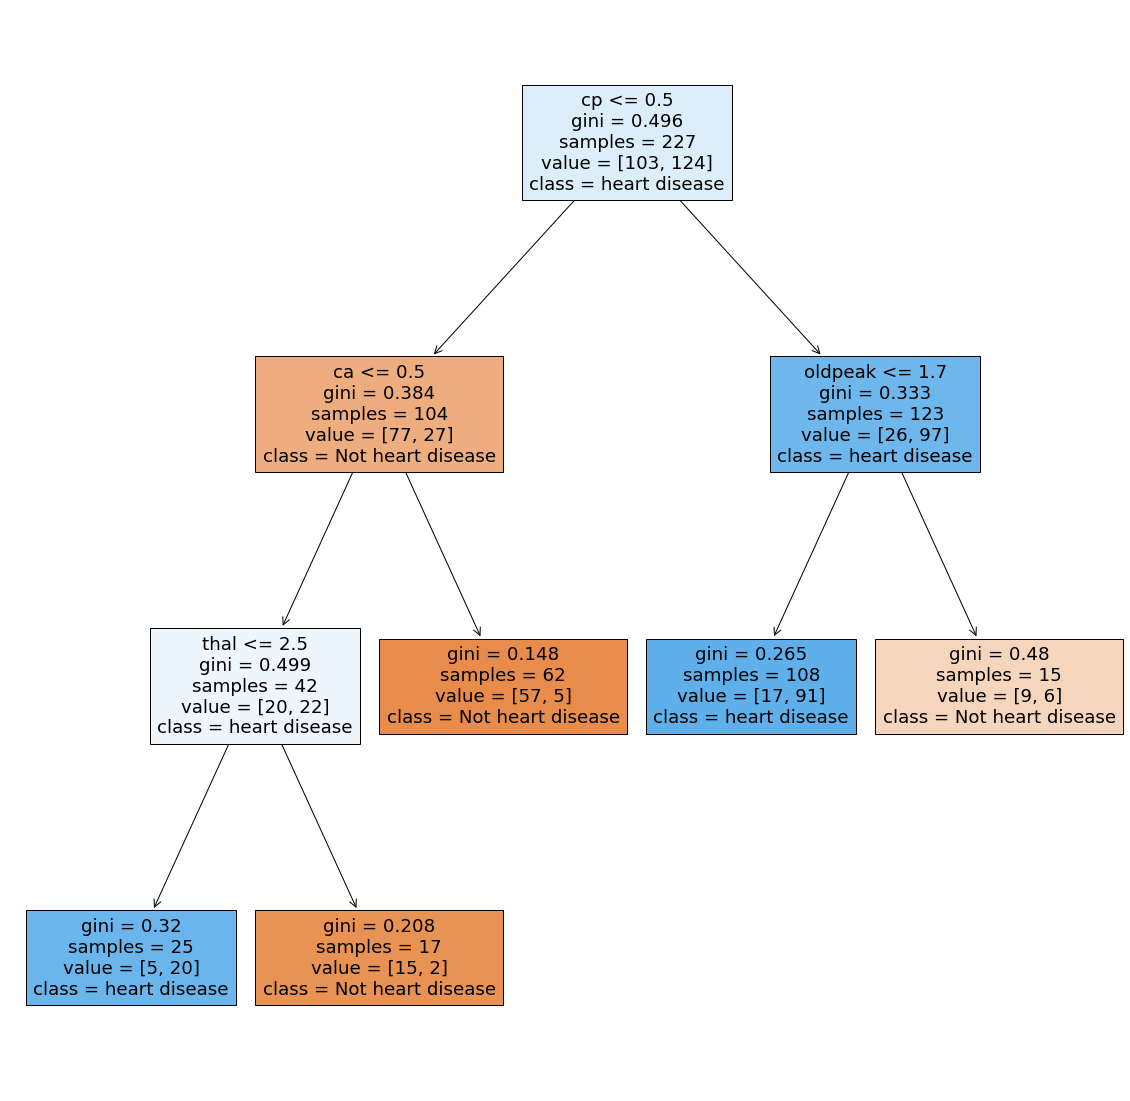

In [19]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [20]:
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7763157894736842


In [30]:
x_test.loc[273]

age          58.0
sex           1.0
cp            0.0
trestbps    100.0
chol        234.0
fbs           0.0
restecg       1.0
thalach     156.0
exang         0.0
oldpeak       0.1
slope         2.0
ca            1.0
thal          3.0
Name: 273, dtype: float64

# input format age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
example: 
#### age can be any valid age in years -->53
#### sex --> 1 for male 0 for female
#### cp --> 0 or 1 or 2 or 3
#### trestbps --> anyvalue between 94 to 200
#### chol --> anyvalue between 126 to 564
#### fbs --> 0 or 1
#### restecg --> 0 or 1
#### thalach --> anyvalue between 71 to 202
#### exang --> 0 or1
#### oldpeak --> anyvalue between 0 to 6.2
####  sample data input --> 58.0, 1.0 , 0.0 , 100.0 , 234.0 , 0.0 , 1.0, 156.0, 0.0, 0.1, 2.0, 1.0 , 3.0